In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers


In [3]:
#PREPROCESSING
#Get images 

training_data_path = 'images/train'
testing_data_path = 'images/test'
validation_data_path = 'images/validation'

In [4]:
# fit images to the same size

image_height = 200
image_width = 200

In [5]:
# function to convert path to greyscaled dataset
def dataset_dir(data_path):
    return tf.keras.utils.image_dataset_from_directory(
        data_path,
        batch_size= 4,
        shuffle=True,
        color_mode= 'rgb',
        image_size= (image_width, image_height),
        validation_split= False)

        

In [6]:

training_data = dataset_dir(training_data_path)

Found 226 files belonging to 3 classes.


In [7]:
categories = training_data.class_names
print(categories)

['Denim', 'Linen', 'Polyester']


In [7]:
testing_data = dataset_dir(testing_data_path)


Found 30 files belonging to 3 classes.


In [8]:
validation_data = dataset_dir(validation_data_path)


Found 30 files belonging to 3 classes.


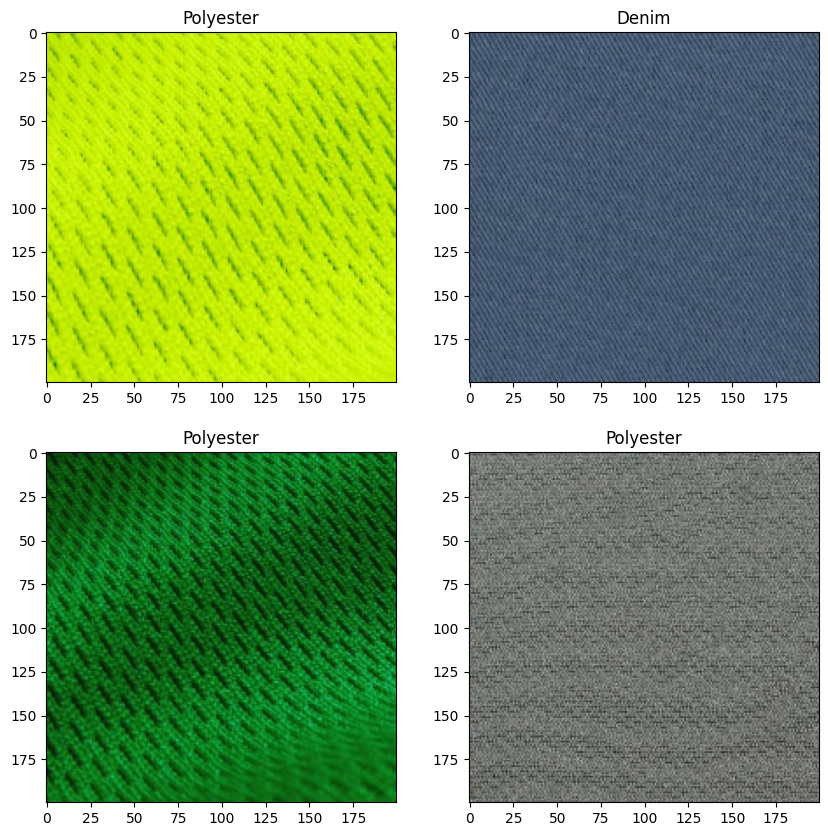

In [11]:
#Show image of each type

plt.figure(figsize=(10,10))
for training_data_point in training_data.take(1):
    images, cat = training_data_point
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(categories[cat[i]])


In [12]:
# CREATING THE MODEL

from tensorflow.keras.models import Sequential


#standard sequntial model from tensorflow keras documentation
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation= 'sigmoid')
    
])

In [13]:
model.compile(optimizer= 'rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Fit the model with n epochs

epochs=35
history = model.fit(
    training_data, 
    validation_data=validation_data,
    epochs=epochs
)

Epoch 1/35
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.3420 - loss: 1.5500 - val_accuracy: 0.5667 - val_loss: 1.1986
Epoch 2/35
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5824 - loss: 1.0168 - val_accuracy: 0.6333 - val_loss: 1.0047
Epoch 3/35
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6304 - loss: 0.9075 - val_accuracy: 0.7000 - val_loss: 0.7859
Epoch 4/35
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6583 - loss: 0.8559 - val_accuracy: 0.5667 - val_loss: 1.0453
Epoch 5/35
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6980 - loss: 0.7877 - val_accuracy: 0.4667 - val_loss: 1.1864
Epoch 6/35
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6926 - loss: 0.7794 - val_accuracy: 0.7000 - val_loss: 0.8703
Epoch 7/35
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6753 - loss: 0.7528 - val_accuracy: 0.7000 - val_loss: 0.8320
Epoch 8/35
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7503 - loss: 0.6674 - val_accuracy: 0.6000 - v

In [15]:
model.evaluate(testing_data)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8711 - loss: 0.2533


[0.32472679018974304, 0.800000011920929]

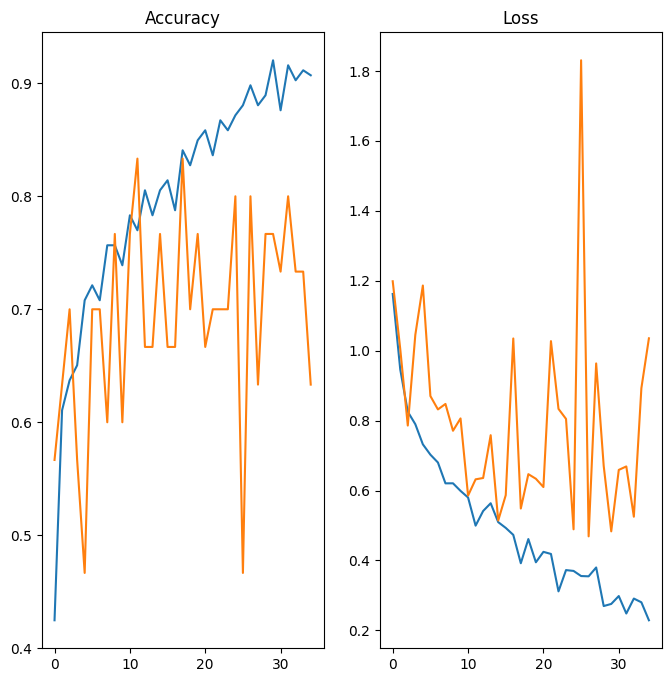

In [16]:
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')
plt.show()


In [17]:
test_image = 'Linen.jpg'
image = tf.keras.utils.load_img(test_image, target_size=(image_height,image_width))
image_array = tf.keras.utils.array_to_img(image)
img_exp = tf.expand_dims(image_array, 0)

In [18]:
prediction = model.predict(img_exp)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[4.5588223e-04 9.9712306e-01 8.1865156e-01]]


In [19]:
accuracy = tf.nn.softmax(prediction)
print(accuracy)

tf.Tensor([[0.16734597 0.45338    0.37927407]], shape=(1, 3), dtype=float32)


In [20]:
print('The fabric shown is {}. This is predicted with {:0.2f} accuracy.'.format(categories[np.argmax(accuracy)], np.max(accuracy)*100))

The fabric shown is Linen. This is predicted with 45.34 accuracy.


In [22]:
model.save("fabric_classification.keras")